<a href="https://colab.research.google.com/github/majavarsava/ObradaPrirodnogJezika-LV/blob/main/LV4_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LV 4: Word Embeddings i Semantička Sličnost

---

## 1. Uvod u Word Embeddings

Word embeddings predstavljaju tehniku prikaza riječi u numeričkom obliku ("vektori riječi") gdje su slične riječi (po značenju) smještene blizu u vektorskom prostoru. Umjesto rada s pojedinačnim riječima, tekstualne podatke modeliramo kao skup vektora koji dobro zadržavaju semantičke odnose. Time omogućujemo računalima napredno razumijevanje značenja riječi, pa se embeddingi koriste u zadacima poput prepoznavanja sinonima, pronalaženja antonima, mjerenja sličnosti rečenica i mnogim naprednim aplikacijama obrade jezika.

### Najčešće korištene tehnike:
- **Word2Vec**: model treniran na temelju konteksta riječi (CBOW i Skip-gram)
- **GloVe** (Global Vectors): kombinira globalnu statistiku i lokalni kontekst
- **FastText**: proširenje Word2Veca koje uključuje podriječi

### Korištenjem pretreniranih modela embeddinga možemo:
- Lako pronaći slične i suprotne riječi
- Vizualizirati prostorne odnose između pojmova (PCA, t-SNE)
- Mjeriti sličnost između rečenica ili dokumenata
- Koristiti embeddinge kao ulazne podatke za napredne NLP modele

Nakon ove vježbe studenti će moći raditi s embeddingima, razumjeti kako oni predstavljaju značenje riječi te koristiti embeddinge za analizu sličnosti i semantičkih odnosa u tekstu.

---



## 2. Korištene biblioteke

U ovoj vježbi koristimo:

**gensim**  
Biblioteka za rad s word embeddingima, uključuje:
- Učitavanje pretreniranih Word2Vec i GloVe modela
- Računanje semantičke sličnosti
- Operacije s vektorima riječi

**scikit-learn**  
Za smanjenje dimenzionalnosti i vizualizaciju (PCA, t-SNE).

**matplotlib**  
Za crtanje grafova i vizualizacija embedding prostora.

**numpy**  
Za matematičke operacije s vektorima.

---


In [1]:
!pip install -q gensim numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 28.0 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3. Inicijalizacija okruženja i učitavanje modela

---

### Primjer: Učitavanje pretreniranog Word2Vec modela

Gensim biblioteka omogućuje jednostavno preuzimanje različitih pretreniranih modela. U ovom primjeru koristimo **glove-wiki-gigaword-50**, manji model (50 dimenzija) pogodan za brzo testiranje.

Možete koristiti i veće modele poput:
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `word2vec-google-news-300` (vrlo velik, potrebno više vremena)


In [3]:
print("Učitavanje modela...")
model = api.load("glove-wiki-gigaword-50")
print("Model uspješno učitan!")

print(f"Broj riječi u modelu: {len(model)}")

Učitavanje modela...
[==================================================] 100.0% 66.0/66.0MB downloaded
Model uspješno učitan!
Broj riječi u modelu: 400000


---

### Primjer: Prikaz vektora riječi

Svaka riječ u modelu ima svoj vektor (niz brojeva). Duljina vektora ovisi o modelu – ovdje je 50 dimenzija.

Demonstracija kako izgleda embedding za riječ "king".


In [4]:
vector_king = model['king']

print(f"Vektor za riječ 'king' (prvih 10 vrijednosti):")
print(vector_king[:10])

print(f"\nDuljina vektora: {len(vector_king)}")
print(f"Tip podatka: {type(vector_king)}")


Vektor za riječ 'king' (prvih 10 vrijednosti):
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Duljina vektora: 50
Tip podatka: <class 'numpy.ndarray'>


---

### Primjer: Računanje sličnosti između dviju riječi

Embeddings omogućuju mjerenje semantičke sličnosti. Model računa **kosinusnu sličnost** između vektora dviju riječi. Vrijednost je između 0 (potpuno različite) i 1 (identične).


In [5]:

similarity = model.similarity('king', 'queen')
print(f"Sličnost između 'king' i 'queen': {similarity:.4f}")

similarity2 = model.similarity('king', 'apple')
print(f"Sličnost između 'king' i 'apple': {similarity2:.4f}")

similarity3 = model.similarity('computer', 'laptop')
print(f"Sličnost između 'computer' i 'laptop': {similarity3:.4f}")


Sličnost između 'king' i 'queen': 0.7839
Sličnost između 'king' i 'apple': 0.3047
Sličnost između 'computer' i 'laptop': 0.7741


---

### Primjer: Pronalaženje sličnih riječi

Možemo pronaći riječi koje su najbliže (najsličnije) odabranoj riječi, korisno za traženje sinonima.


In [6]:

similar_words = model.most_similar('king', topn=5)

print("5 najsličnijih riječi za 'king':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")


5 najsličnijih riječi za 'king':
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667


---

### Primjer: Semantičke operacije – Vektorska aritmetika

Jedan od najpoznatijih primjera word embeddinga je **king - man + woman ≈ queen**.

Ovim pristupom možemo "računati" sa značenjima riječi.


In [7]:
# King - man + woman = ?
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print("king - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

# Paris - France + Italy = ?
result2 = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=3)

print("\nparis - france + italy =")
for word, score in result2:
    print(f"  {word}: {score:.4f}")


king - man + woman =
  queen (sličnost: 0.8524)

paris - france + italy =
  rome: 0.8466
  milan: 0.7766
  turin: 0.7666


---

### Primjer: Vizualizacija embeddinga pomoću PCA

PCA (Principal Component Analysis) je linearni algoritam koji smanjuje broj dimenzija vektora, zadržavajući što više informacija. Koristimo ga za prikaz riječi u 2D prostoru.

Ovdje ćemo vizualizirati nekoliko odabranih riječi iz različitih domena.


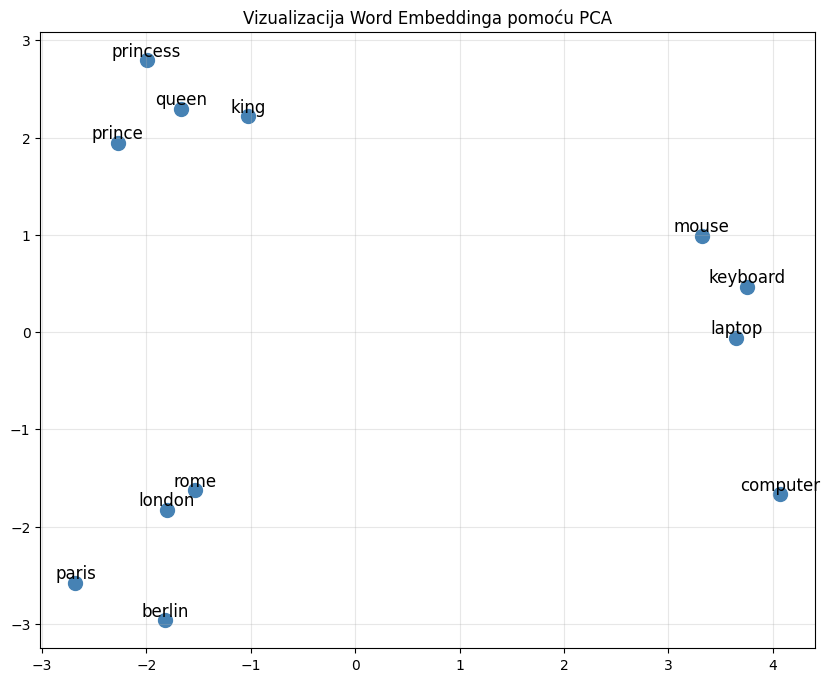

In [8]:
words = ['king', 'queen', 'prince', 'princess',
         'paris', 'london', 'berlin', 'rome',
         'computer', 'laptop', 'keyboard', 'mouse']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=100, color='steelblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću PCA')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Vizualizacija embeddinga pomoću t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je nelinearna tehnika koja bolje čuva lokalne odnose između riječi. Često daje preglednije klastere nego PCA.

**Napomena**: t-SNE može davati različite rezultate pri svakom pokretanju zbog stohastičke prirode algoritma.


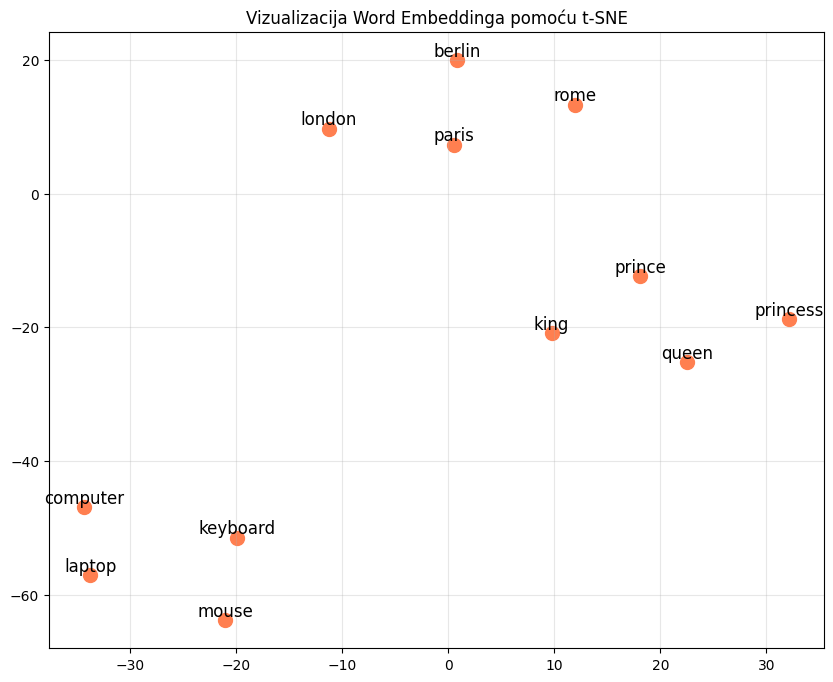

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, color='coral')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_tsne[i, 0], coords_tsne[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Računanje sličnosti rečenica

Isti pristup možemo proširiti i na rečenice: najjednostavniji način je izračunati prosječni embedding, odnosno prosjek vektora svih riječi u rečenici.

**Napomena**: Ova metoda ne uzima u obzir redoslijed riječi, ali daje korisnu aproksimaciju semantičke sličnosti.


In [10]:
def sentence_vector(sentence, model):
    words = [word.lower() for word in sentence.split() if word.lower() in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)


s1 = "The cat sits on the mat."
s2 = "A dog rests on the carpet."
s3 = "I love programming in Python."

print(f"Sličnost između rečenica 1 i 2: {sentence_similarity(s1, s2, model):.4f}")
print(f"Sličnost između rečenica 1 i 3: {sentence_similarity(s1, s3, model):.4f}")
print(f"Sličnost između rečenica 2 i 3: {sentence_similarity(s2, s3, model):.4f}")

Sličnost između rečenica 1 i 2: 0.9715
Sličnost između rečenica 1 i 3: 0.8037
Sličnost između rečenica 2 i 3: 0.8108


## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

Koristite učitani Word2Vec/GloVe model za istraživanje semantičkih odnosa između riječi. Pronađite sinonime, testirajte vektorsku aritmetiku i analizirajte rezultate.



1. Pronađite 10 najsličnijih riječi za pojam "doctor"
2. Pronađite 10 najsličnijih riječi za pojam "technology"
3. Testirajte vektorsku aritmetiku:
   - king - man + woman = ?
   - doctor - man + woman = ?
   - berlin - germany + france = ?
   - python - programming + cooking = ?
4. Analizirajte rezultate i objasnite koje analogije model dobro prepoznaje, a gdje griješi


In [13]:
# Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

#1
similar_doctor = model.most_similar('doctor', topn=10)

print("10 najsličnijih riječi za 'doctor':")
for word, score in similar_doctor:
    print(f"  {word}: {score:.4f}")

#2
similar_tech = model.most_similar('technology', topn=10)

print("\n10 najsličnijih riječi za 'technology':")
for word, score in similar_tech:
    print(f"  {word}: {score:.4f}")


#3
a = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
b = model.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=3)
c = model.most_similar(positive=['berlin', 'france'], negative=['germany'], topn=3)
d = model.most_similar(positive=['python', 'cooking'], negative=['programming'], topn=3)

print("\nking - man + woman =")
for word, score in a:
    print(f"  {word}: {score:.4f}")

print("\ndoctor - man + woman =")
for word, score in b:
    print(f"  {word}: {score:.4f}")

print("\nberlin - germany + france =")
for word, score in c:
    print(f"  {word}: {score:.4f}")

print("\npython - programming + cooking =")
for word, score in d:
    print(f"  {word}: {score:.4f}")



10 najsličnijih riječi za 'doctor':
  nurse: 0.7977
  physician: 0.7965
  patient: 0.7612
  child: 0.7559
  teacher: 0.7538
  surgeon: 0.7479
  psychiatrist: 0.7422
  doctors: 0.7394
  father: 0.7334
  mother: 0.7284

10 najsličnijih riječi za 'technology':
  technologies: 0.8928
  computer: 0.8526
  systems: 0.8289
  software: 0.8090
  computing: 0.7991
  innovation: 0.7876
  business: 0.7864
  tool: 0.7848
  developed: 0.7802
  research: 0.7735

king - man + woman =
  queen: 0.8524

doctor - man + woman =
  nurse: 0.8405
  child: 0.7663
  pregnant: 0.7570

berlin - germany + france =
  paris: 0.9169
  prohertrib: 0.7950
  brussels: 0.7606

python - programming + cooking =
  roasted: 0.6643
  goat: 0.6612
  seaweed: 0.6557


Za pojam doctor model pronalazi riječi poput nurse, physician, surgeon i psychiatrist - uspješno prepoznaje medicinski kontekst i povezana zanimanja.
Među sličnim pojmovima se pojavljuju i pojmovi poput child, father i mother - koji nisu sinonimi, već često pojavljivani pojmovi u medicinskim tekstovima. Znači da model uči značenja na temelju statističkog pojavljivanja riječi u tekstu, a ne na temelju stvarnog značenja.

Za pojam technology dobro identificira tematski povezane riječi kao što su technologies, software, systems i computing. Ovdje je semantički konzistentan i jasno pokazuje da model razumije tehnološku domenu, iako se pojavljuju tu i business i research koji jesu često povezani s tehnologijom, ali nisu izravni sinonimi.

Analogije poput king − man + woman = queen teberlin − germany + france = paris su vrlo dobro rješene.

Kod analogije doctor − man + woman, model kao najbliži rezultat vraća nurse. Iako je nurse medicinsko zanimanje, rezultat pokazuje prisutnost rodne pristranosti u modelu, gdje se određene profesije statistički češće povezuju s određenim spolom. Ostali rezultati (child, pregnant) dodatno potvrđuju da model ne razumije stvarni koncept roda, već se oslanja na obrasce iz podataka.

Najslabiji rezultati dobiveni su kod analogije python − programming + cooking, gdje model vraća riječi poput roasted, goat i seaweed. Ovdje ne postoji jasan semantički odnos koji bi model mogao naučiti, jer se miješaju tehnička i kulinarska domena. Ovaj primjer jasno pokazuje ograničenje vektorske aritmetike kod apstraktnih i nelogičnih analogija.

## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





Implementirajte funkciju koja detektira koja riječ ne pripada grupi sličnih riječi. Ovo je praktična primjena u analizi teksta i detekciji anomalija

**Napomena**:  Koristite embedding model za pronalaženje "outliera".

Testirajte sljedeće grupe riječi i pronađite koja riječ ne pripada:

1. ['breakfast', 'lunch', 'dinner', 'cement']
2. ['cat', 'dog', 'mouse', 'computer']
3. ['paris', 'london', 'berlin', 'table']
4. ['happy', 'joyful', 'cheerful', 'angry']
5. ['python', 'java', 'javascript', 'banana']

Za svaku grupu:
- Pronađite outlier riječ
- Izračunajte njenu prosječnu sličnost s ostalim riječima
- Objasnite zašto je detektirana kao outlier


In [14]:
test_groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

In [15]:
# Zadatak 2: Detekcija outliera

def find_outlier(words, model):
    similarities = {}

    for w in words:
        sims = []
        for other in words:
            if w != other:
                sims.append(model.similarity(w, other))
        similarities[w] = np.mean(sims)

    outlier = min(similarities, key=similarities.get)
    return outlier, similarities[outlier], similarities


In [17]:
for group in test_groups:
    outlier, avg_sim, all_sims = find_outlier(group, model)

    print(f"\nGrupa riječi: {group}")
    print("Prosječne sličnosti:")
    for word, sim in all_sims.items():
        print(f"  {word}: {sim:.4f}")

    print(f"Outlier: {outlier} (prosječna sličnost: {avg_sim:.4f})")



Grupa riječi: ['breakfast', 'lunch', 'dinner', 'cement']
Prosječne sličnosti:
  breakfast: 0.6311
  lunch: 0.6091
  dinner: 0.6038
  cement: 0.1079
Outlier: cement (prosječna sličnost: 0.1079)

Grupa riječi: ['cat', 'dog', 'mouse', 'computer']
Prosječne sličnosti:
  cat: 0.6825
  dog: 0.6348
  mouse: 0.6491
  computer: 0.4032
Outlier: computer (prosječna sličnost: 0.4032)

Grupa riječi: ['paris', 'london', 'berlin', 'table']
Prosječne sličnosti:
  paris: 0.6333
  london: 0.6087
  berlin: 0.5761
  table: 0.4166
Outlier: table (prosječna sličnost: 0.4166)

Grupa riječi: ['happy', 'joyful', 'cheerful', 'angry']
Prosječne sličnosti:
  happy: 0.5672
  joyful: 0.5485
  cheerful: 0.5647
  angry: 0.4812
Outlier: angry (prosječna sličnost: 0.4812)

Grupa riječi: ['python', 'java', 'javascript', 'banana']
Prosječne sličnosti:
  python: 0.3773
  java: 0.4400
  javascript: 0.3908
  banana: 0.1410
Outlier: banana (prosječna sličnost: 0.1410)


## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


Vizualizirajte embedding prostor za riječi iz različitih domena (hrana, tehnologija, sport, gradovi). Usporedite PCA i t-SNE vizualizacije.

Koristite sljedeće riječi iz 4 kategorije:
- Hrana: ['pizza', 'burger', 'pasta', 'salad', 'bread']
- Tehnologija: ['computer', 'laptop', 'smartphone', 'tablet', 'software']
- Sport: ['football', 'basketball', 'tennis', 'swimming', 'running']
- Gradovi: ['paris', 'london', 'tokyo', 'berlin', 'rome']

Zadaci:
1. Vizualizirajte sve riječi pomoću PCA u 2D prostoru
2. Vizualizirajte iste riječi pomoću t-SNE
3. Obojite svaku kategoriju različitom bojom
4. Usporedite rezultate i objasnite razlike između PCA i t-SNE


In [18]:
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

In [19]:
# Zadatak 3: Vizualizacija tematskih klastera

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

words = []
labels = []

for category, word_list in categories.items():
    for word in word_list:
        words.append(word)
        labels.append(category)

word_vectors = np.array([model[word] for word in words])

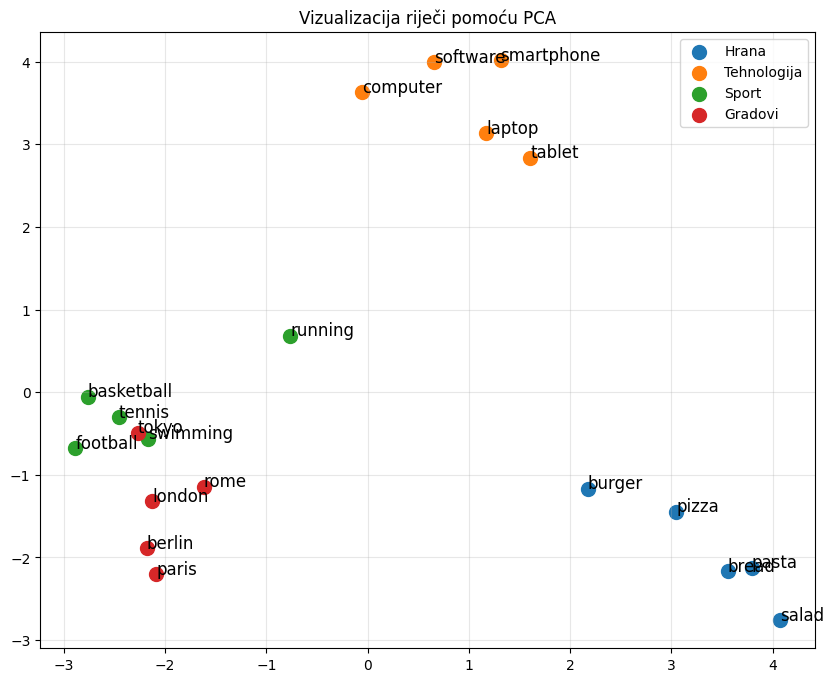

In [20]:
pca = PCA(n_components=2)
coords_pca = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))

for category in categories.keys():
  idx = [i for i, label in enumerate(labels) if label == category]
  plt.scatter(coords_pca[idx,0], coords_pca[idx,1], label=category, s=100)

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_pca[i, 0], coords_pca[i, 1]), fontsize=12)

plt.title('Vizualizacija riječi pomoću PCA')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

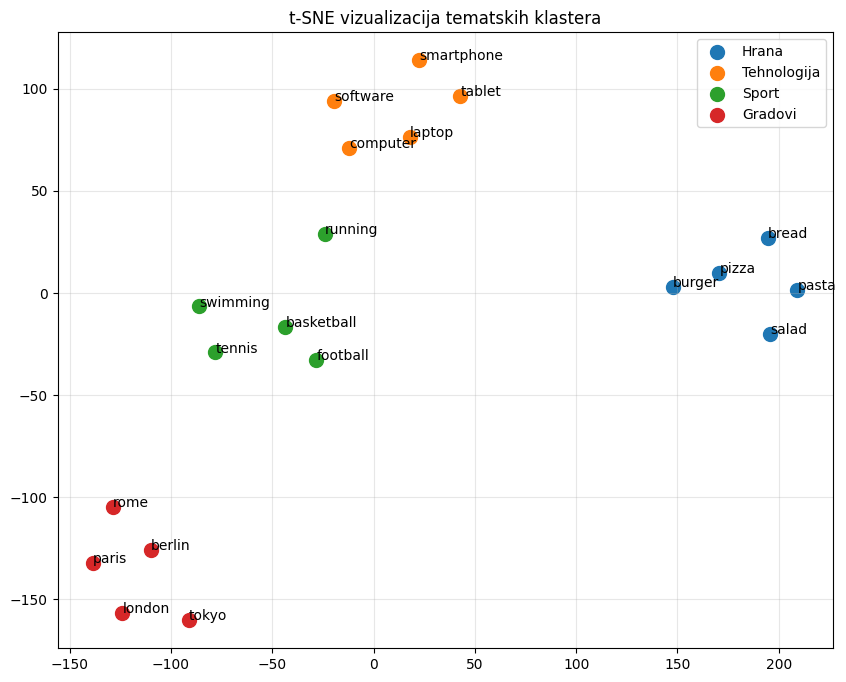

In [21]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))

for category in categories.keys():
    idx = [i for i, label in enumerate(labels) if label == category]
    plt.scatter(coords_tsne[idx, 0], coords_tsne[idx, 1], label=category, s=100)

for i, word in enumerate(words):
    plt.annotate(word, (coords_tsne[i, 0], coords_tsne[i, 1]), fontsize=10)

plt.title("t-SNE vizualizacija tematskih klastera")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


U PCA vizualizaciji - riječi povezane sa sportom grupirane su relativno blizu jedna drugoj, no istovremeno su im u prostoru bliži i neki gradovi poput Tokyo, Rome, London nego riječi running - koja bi semantički trebala pripadati istoj sportskoj kategoriji.
To ukazuje na ograničenje PCA metode, koja nastoji sačuvati globalnu vrijednost podataka, ali ne uspijeva uvijek jasno razdvojiti tematske klastere.

S druge strane, t-SNE vizualizacija daje znatno jasnije rezultate. Sve kategorije jasno su međusobno udaljene, dok su riječi unutar iste kategorije smještene blizu jedna drugoj.
To ukazuje da t-SNE bolje čuva lokalne odnose između vektora i učinkovitije razdvaja tematske skupine.

## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



Implementirajte funkciju za mjerenje sličnosti rečenica i testirajte na različitim parovima rečenica te analizirajte gdje metoda radi dobro, a gdje ima ograničenja.


Funkciju testirajte je na sljedećim parovima rečenica:

1. "The cat sits on the mat." vs "A cat is sitting on a rug."
2. "I love programming in Python." vs "Python programming is my passion."
3. "The weather is nice today." vs "I enjoy coding in Python."
4. "Machine learning is fascinating." vs "Artificial intelligence is interesting."
5. "How do I reset my password?" vs "I forgot my password, how to recover it?"
6. "The quick brown fox jumps." vs "A fast auburn fox leaps."

Zadaci:
1. Implementirajte funkciju sentence_similarity() koja računa prosječni embedding
2. Izračunajte sličnost za sve parove
3. Analizirajte rezultate - koje parove model prepoznaje kao slične?
4. Identificirajte ograničenja metode prosječnog embeddinga
5. Predložite moguća poboljšanja


In [23]:
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

In [24]:
# Zadatak 4: Semantička sličnost rečenica

import numpy as np

def sentence_vector(sentence, model):
    words = [
        word.lower().strip(".,!?")
        for word in sentence.split()
        if word.lower().strip(".,!?") in model
    ]

    if not words:
        return np.zeros(model.vector_size)

    return np.mean([model[word] for word in words], axis=0)


def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    if np.linalg.norm(vec1) == 0 or np.linalg.norm(vec2) == 0:
        return 0.0

    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


In [26]:
for s1, s2 in sentence_pairs:
    sim = sentence_similarity(s1, s2, model)
    print(f"\"{s1}\"")
    print(f"\"{s2}\"")
    print(f"Sličnost: {sim:.4f}\n")


"The cat sits on the mat."
"A cat is sitting on a rug."
Sličnost: 0.9524

"I love programming in Python."
"Python programming is my passion."
Sličnost: 0.9664

"The weather is nice today."
"I enjoy coding in Python."
Sličnost: 0.8401

"Machine learning is fascinating."
"Artificial intelligence is interesting."
Sličnost: 0.8881

"How do I reset my password?"
"I forgot my password, how to recover it?"
Sličnost: 0.9632

"The quick brown fox jumps."
"A fast auburn fox leaps."
Sličnost: 0.9158



Koje parove model prepoznaje kao slične?
Model prepoznaje većinu zadanih parova kao semantički slične, što je vidljivo iz visokih vrijednosti kosinusne sličnosti.

„Machine learning is fascinating.” – „Artificial intelligence is interesting.” (0.8881)
Iako se ne koriste iste riječi, pojmovi machine learning i artificial intelligence su tematski vrlo bliski. Model uspješno prepoznaje semantičku povezanost ovih domena.

Uočeni problematičan slučaj

„The weather is nice today.” – „I enjoy coding in Python.” (0.8401)
Iako su rečenice tematski nepovezane, sličnost je relativno visoka. To pokazuje da metoda prosječnog embeddinga ponekad precjenjuje sličnost, osobito kada rečenice sadrže općenite ili često korištene riječi.

Ograničenja metode prosječnog embeddinga

- ignoriranje redoslijeda riječi - prosječni embedding ne uzima u obzir strukturu rečenice ni gramatičke odnose
- jednaka težina svih riječi - važne riječi imaju isti utjecaj kao manje važne riječi
- gubitak konteksta i značenja cijele rečenice - model ne razumije negaciju, ironiju ni najeru izvan pojedinačnih riječi


Moguća poboljšanja metode

- ponderiranje riječi pomoću TF-IDF-a - važnije riječi daju veći utjecaj na vektor rečenice

- uklanjanje stop riječi

- korištenje naprednijih modela za rečenice